In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

img = image.load_img('cat.jpg', target_size=(224, 224)) # for vgg input size: 224 x 224

In [3]:
type(img)

PIL.Image.Image

Populating the interactive namespace from numpy and matplotlib


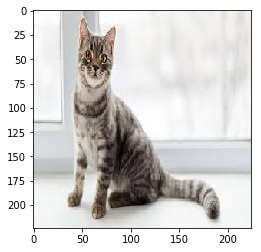

In [4]:
%pylab inline
from matplotlib import pyplot as plt

plt.imshow(img)

## VGG-16
<p> Very Deep Convolutional Networks for Large-Scale Image Recognition </p>
<p> https://arxiv.org/abs/1409.1556 </p>

In [5]:
from keras.applications import vgg16

model = vgg16.VGG16(weights='imagenet', include_top=True)


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
# Test pretrained model
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='categorical_crossentropy')


In [8]:
from keras.applications.vgg16 import preprocess_input

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [9]:
print(np.argmax(features))

285


In [10]:
type(features)

numpy.ndarray

In [11]:
vgg16.decode_predictions(features)

[[('n02124075', 'Egyptian_cat', 0.95058227),
  ('n02123045', 'tabby', 0.035860196),
  ('n02123159', 'tiger_cat', 0.011460044),
  ('n02127052', 'lynx', 0.00066279463),
  ('n04040759', 'radiator', 0.00025722297)]]

In [12]:
## Egyptian_cat 埃及貓  95.05%
## tabby        虎斑貓   3.58%
## tiger_cat    虎貓     1.14%
## lynx         山貓     0.06%
## radiator     散熱器   0.02%

![](cat.jpg)